# Loan application status prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.shape

(614, 13)

# Preprocessing of data

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
from sklearn. preprocessing import OneHotEncoder
from sklearn. impute import SimpleImputer  
from sklearn. compose import make_column_transformer

In [9]:
# Filling the missing values of numerical data- mean

In [10]:
df['LoanAmount'] =df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] =df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] =df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
# Filling the missing values of categorical data- mode

df['Gender'] =df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] =df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] =df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] =df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Anlysis

In [13]:
# categorigal attributes distribution

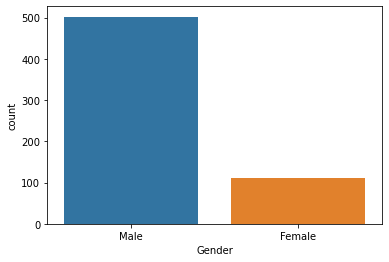

In [14]:
ax=sns.countplot(x = 'Gender', data =df)

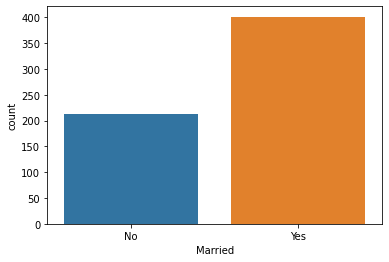

In [15]:
ax=sns.countplot(x = 'Married', data =df)

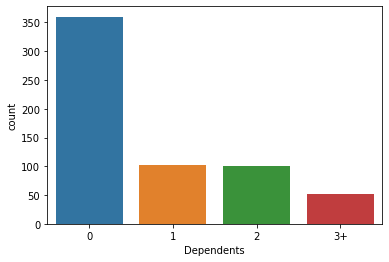

In [16]:
ax=sns.countplot(x = 'Dependents', data =df)

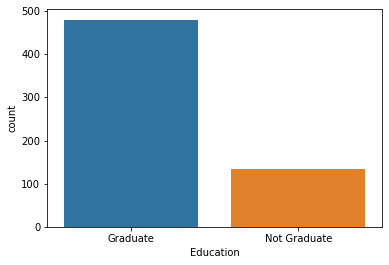

In [17]:
ax=sns.countplot(x = 'Education', data =df)

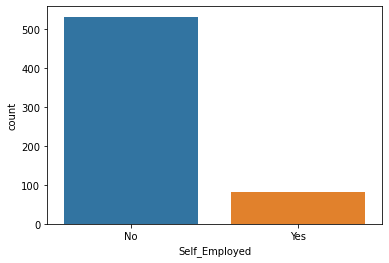

In [18]:
ax=sns.countplot(x = 'Self_Employed', data =df)

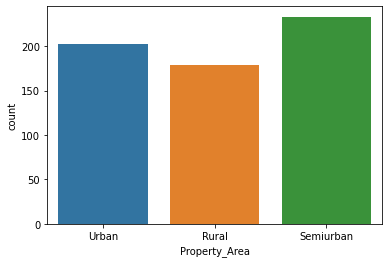

In [19]:
ax=sns.countplot(x = 'Property_Area', data =df)

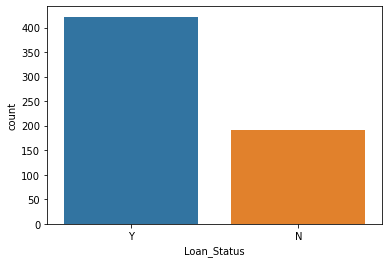

In [20]:
ax=sns.countplot(x = 'Loan_Status', data =df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


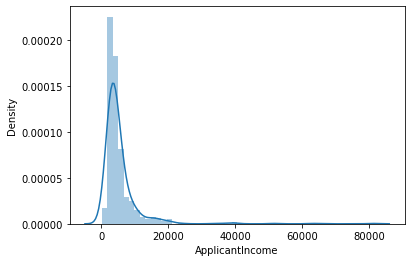

In [21]:
# numerical attributes distribution

ax=sns.distplot(df['ApplicantIncome'])

In [22]:
# skewness can be seen, so removing the skewness using log transform

#df['ApplicantIncome'] = np.log(['ApplicantIncome'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


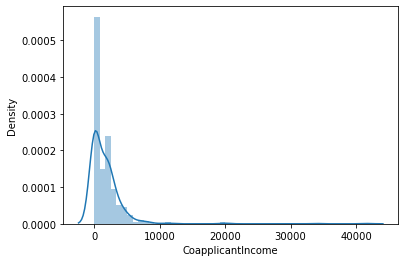

In [23]:
ax=sns.distplot(df['CoapplicantIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


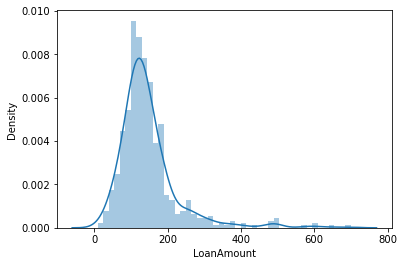

In [24]:
ax=sns.distplot(df['LoanAmount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


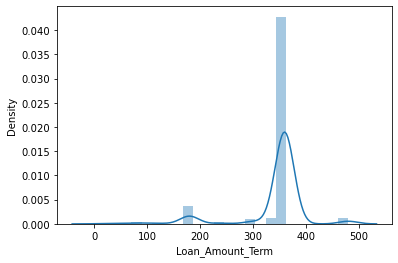

In [25]:
ax=sns.distplot(df['Loan_Amount_Term'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


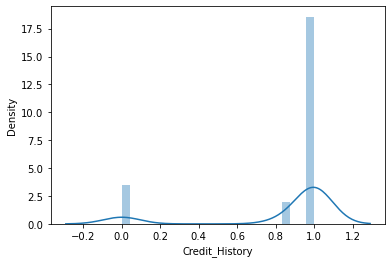

In [26]:
ax=sns.distplot(df['Credit_History'])

In [27]:
df.skew()

C:\Users\SC\AppData\Local\Temp/ipykernel_13876/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

skewness can be seen.

In [28]:
# Dropping unnecessary  features

df = df.drop('Loan_ID', axis=1)

# Encoding the Data

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [32]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [33]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


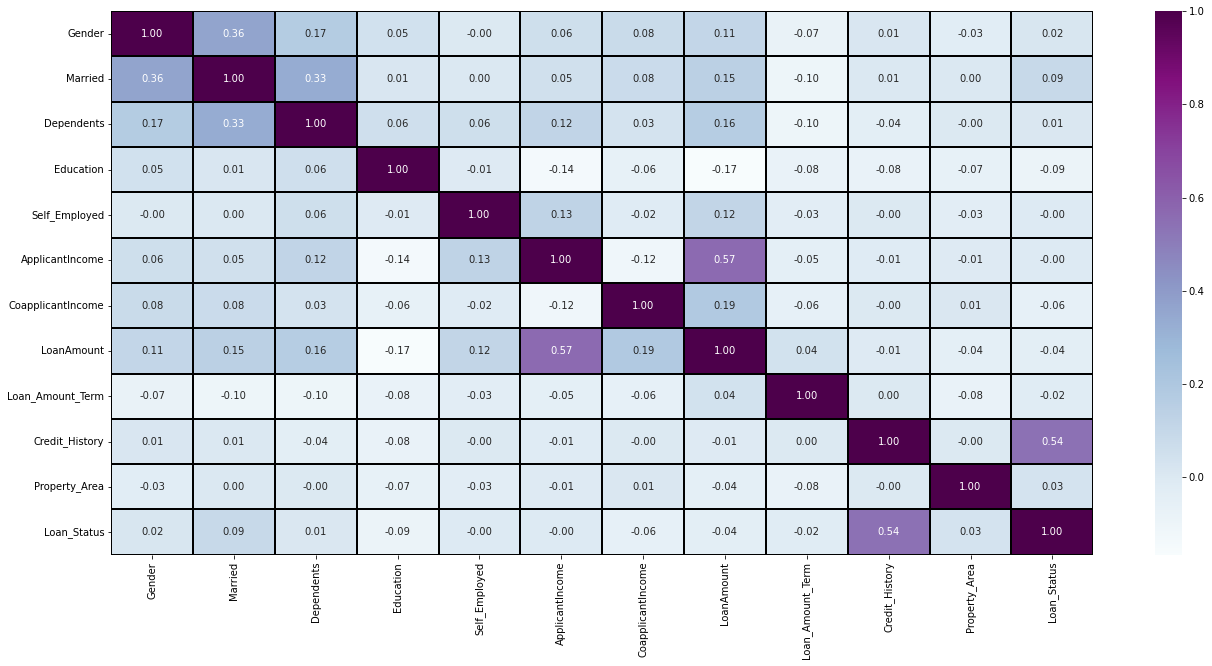

In [34]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f', cmap = 'BuPu')
plt.show()

C:\Users\SC\AppData\Local\Temp/ipykernel_13876/1615043840.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('features',fontSize=18)
C:\Users\SC\AppData\Local\Temp/ipykernel_13876/1615043840.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('column with target name',fontSize=18)
C:\Users\SC\AppData\Local\Temp/ipykernel_13876/1615043840.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Correlation',fontSize=20)


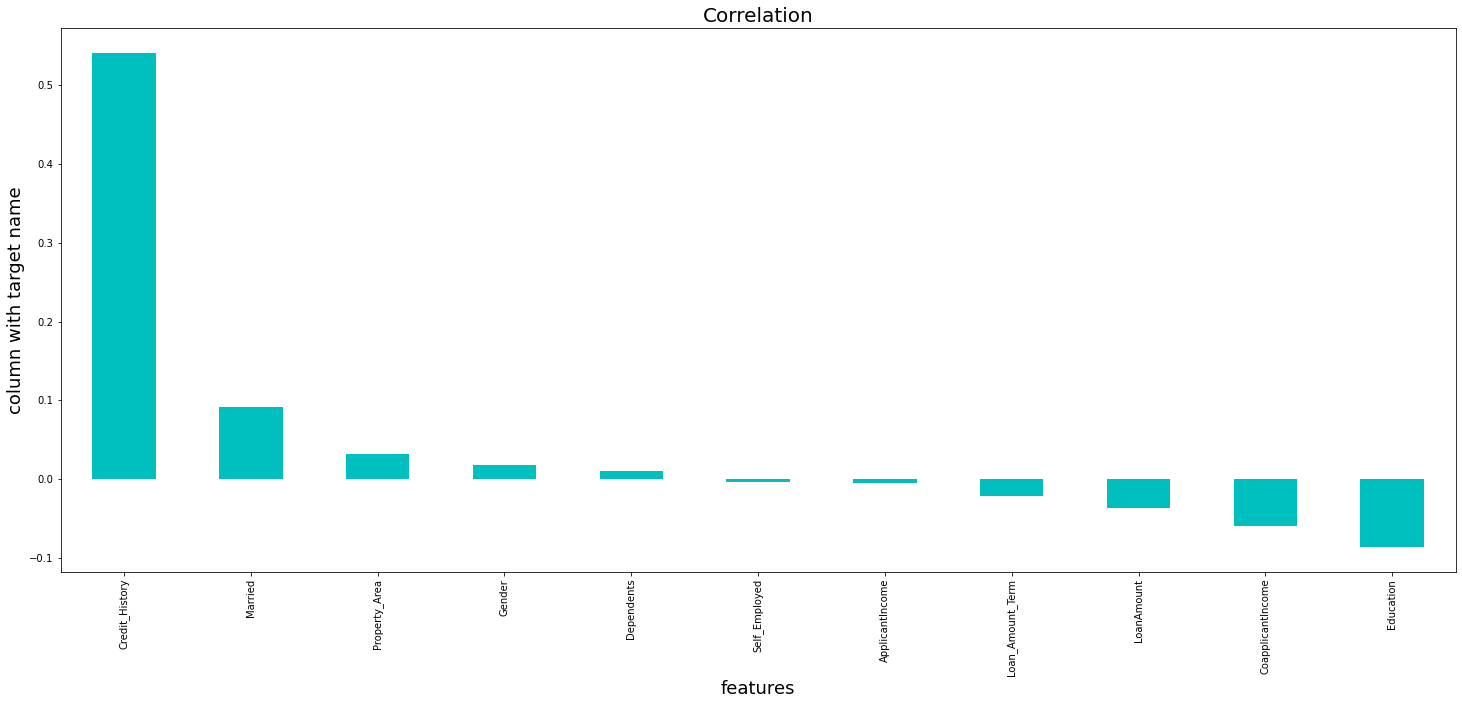

In [35]:
plt.figure(figsize=(25,10))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('features',fontSize=18)
plt.ylabel('column with target name',fontSize=18)
plt.title('Correlation',fontSize=20)
plt.show()

# Checking Outlier

<AxesSubplot:>

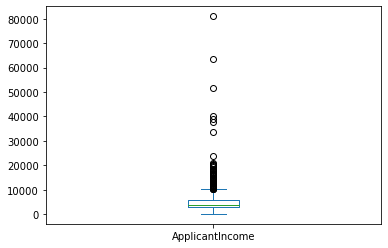

In [36]:
df['ApplicantIncome'].plot.box()

<AxesSubplot:>

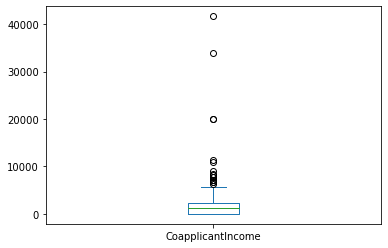

In [37]:
df['CoapplicantIncome'].plot.box()

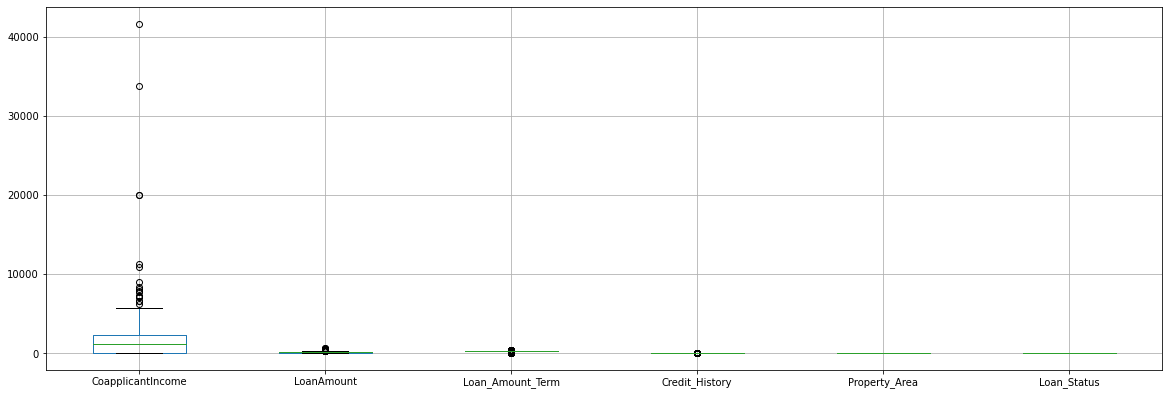

In [38]:
df.iloc[:,6:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

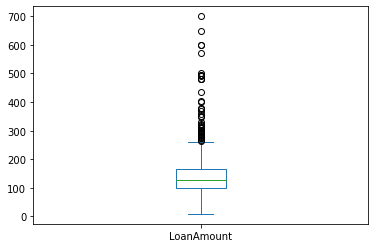

In [39]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

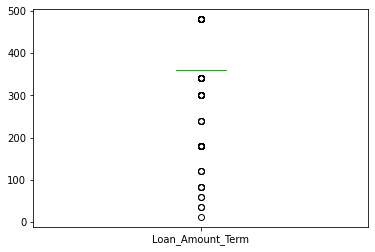

In [40]:
df['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

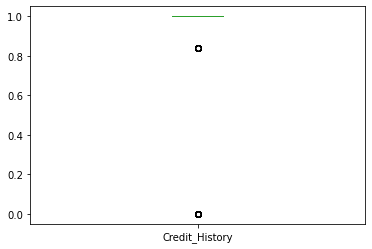

In [41]:
df['Credit_History'].plot.box()

In [42]:
df['Credit_History'].unique()

array([1.        , 0.        , 0.84219858])

In [43]:
df.shape

(614, 12)

# Outlier Removal

In [44]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [45]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [46]:
df_new.shape

(577, 12)

In [47]:
## Percentage Loss of data

In [48]:
Data_loss=((614-577)/614)*100

In [49]:
Data_loss

6.026058631921824

Not Removing the Outliers, as alot of the outliers are at the whrisk and the model is getting biased.

In [64]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Keeping +/-0.5 as the threshold value for skewness

All the nominal type attributes are skewed :
    
ApplicantIncome      6.539513


CoapplicantIncome    7.491531

LoanAmount           2.726601

Loan_Amount_Term    -2.389680

Credit_History      -1.963600

Property_Area       -0.066196

Rest are categorical and target varible

# Sepertating the columns into features and target

In [65]:
feature=df.drop("Loan_Status",axis=1)
target=df['Loan_Status']

# Removing Skewness

In [66]:
from sklearn.preprocessing import power_transform
feature=power_transform(feature)

In [67]:
feature

array([[ 0.47234264, -1.37208932, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263, -1.35000343],
       [ 0.47234264,  0.72881553, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       ...,
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  1.31670248, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [-2.11710719, -1.37208932, -0.82710431, ...,  0.18590509,
        -2.2471956 ,  0.00236103]])

# Sepertating the columns into features and target 

In [68]:
# feature=df.drop("loan_Status",axis=1)
# target=df['loan_Status']

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
feature=sc.fit_transform(feature)
feature

array([[ 0.47234264, -1.37208932, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263, -1.35000343],
       [ 0.47234264,  0.72881553, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       ...,
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  1.31670248, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [-2.11710719, -1.37208932, -0.82710431, ...,  0.18590509,
        -2.2471956 ,  0.00236103]])

# Training Process begins

finding best training state

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Best random state

In [71]:
maxAccu=0 # maximum accuracy
maxRS =0 #best random state for which maximum accuracy is achieved

for i in range(1,200):
    feature_train, feature_test,target_train, target_test = train_test_split(feature,target,test_size=20, random_state =i)
    LR = LogisticRegression()
    LR.fit( feature_train, target_train)  # fitting the data trains the model
    predrf = LR.predict( feature_test)  #this is the predicted target variable
    acc = accuracy_score(target_test, predrf)  # accuracy score
    print('accuracy_score', acc, 'random_state',i)
    
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy', maxAccu, 'random_state',i)

accuracy_score 0.95 random_state 1
accuracy 0.95 random_state 1
accuracy_score 0.85 random_state 2
accuracy_score 0.9 random_state 3
accuracy_score 0.7 random_state 4
accuracy_score 0.85 random_state 5
accuracy_score 0.9 random_state 6
accuracy_score 0.8 random_state 7
accuracy_score 0.95 random_state 8
accuracy_score 0.8 random_state 9
accuracy_score 0.75 random_state 10
accuracy_score 0.95 random_state 11
accuracy_score 0.7 random_state 12
accuracy_score 0.85 random_state 13
accuracy_score 0.75 random_state 14
accuracy_score 0.75 random_state 15
accuracy_score 0.8 random_state 16
accuracy_score 0.8 random_state 17
accuracy_score 0.7 random_state 18
accuracy_score 0.95 random_state 19
accuracy_score 0.75 random_state 20
accuracy_score 0.8 random_state 21
accuracy_score 0.7 random_state 22
accuracy_score 0.7 random_state 23
accuracy_score 0.75 random_state 24
accuracy_score 0.65 random_state 25
accuracy_score 0.85 random_state 26
accuracy_score 0.85 random_state 27
accuracy_score 0.85 

In [58]:
print('Best accuracy is',maxAccu, 'on Random state',maxRS)

Best accuracy is 1.0 on Random state 1


# Ceating Train_test split

In [72]:
feature_train, feature_test,target_train, target_test = train_test_split(feature,target,test_size=20, random_state =1)

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(feature_train, target_train)
predlr = LR.predict(feature_test)
print('Accuracy',accuracy_score(target_test,predlr)*100)
print(confusion_matrix(target_test,predlr))
print(classification_report(target_test,predlr))

Accuracy 95.0
[[ 3  1]
 [ 0 16]]
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.94      1.00      0.97        16

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



# SVC

In [74]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(feature_train, target_train)
pred = svc.predict(feature_test)
print('Accuracy',accuracy_score(target_test,pred)*100)
print(confusion_matrix(target_test,pred))
print(classification_report(target_test,pred))

Accuracy 90.0
[[ 2  2]
 [ 0 16]]
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.89      1.00      0.94        16

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20



# Random Forest Clssifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(feature_train, target_train)
predrf = rf.predict(feature_test)
print('Accuracy',accuracy_score(target_test,predrf)*100)
print(confusion_matrix(target_test,predrf))
print(classification_report(target_test,predrf))

Accuracy 85.0
[[ 3  1]
 [ 2 14]]
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         4
         1.0       0.93      0.88      0.90        16

    accuracy                           0.85        20
   macro avg       0.77      0.81      0.78        20
weighted avg       0.87      0.85      0.86        20



 # XGBClassifier

In [88]:
from xgboost import XGBClassifier

In [90]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

XGB = XGBClassifier()
XGB.fit(feature_train, target_train)
predlr = XGB.predict(feature_test)
print('Accuracy',accuracy_score(target_test,predlr)*100)
print(confusion_matrix(target_test,predlr))
print(classification_report(target_test,predlr))

Accuracy 85.0
[[ 3  1]
 [ 2 14]]
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         4
         1.0       0.93      0.88      0.90        16

    accuracy                           0.85        20
   macro avg       0.77      0.81      0.78        20
weighted avg       0.87      0.85      0.86        20



# Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score

scr1= cross_val_score(LR, feature, target, cv=5)
print('cross validation score of LR :', scr1.mean())

cross validation score of Logistic Regression: 0.7915633746501399


In [86]:
from sklearn.model_selection import cross_val_score

scr2= cross_val_score(svc, feature, target, cv=5)
print('cross validation score of SVC :', scr2.mean())

cross validation score of SVC : 0.7964280954284952


In [87]:
from sklearn.model_selection import cross_val_score

scr3= cross_val_score(rf, feature, target, cv=5)
print('cross validation score of Random forest:', scr3.mean())

cross validation score of Random forest: 0.7899506863921097


In [91]:
scr4= cross_val_score(XGB, feature, target, cv=5)
print('cross validation score of Random forest:', scr4.mean())

cross validation score of Random forest: 0.7670798347327735


Logistic Regression is performing better than all

# ROC AUC plot

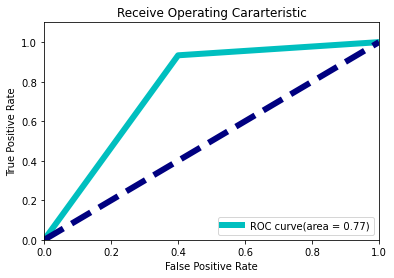

In [96]:
from sklearn.metrics import auc,roc_curve
fpr,tpr,thresholds = roc_curve (predlr,target_test)
roc_auc= auc(fpr,tpr)

plt.figure()
plt.plot( fpr, tpr, color='c', linewidth= 6, label= 'ROC curve(area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', linewidth= 6, linestyle='dashed')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receive Operating Cararteristic')
plt.legend(loc='lower right')
plt.show()

In [97]:
import pickle
filename = 'inhouse_LoanStatus.pkl'
pickle.dump(LR, open(filename, 'wb'))